# Women's Clothing E-Commerce with Natural Language Processing 
_By Nicolas Brooks, Summer 2017_

***

**Programming Language:** Python 3.5 in the Jupyter Notebook Environment

**Textbook Resources Used:** <br>
- Swamynathan, Manohar. Mastering Machine Learning with Python in Six Steps: a Practical
- Implementation Guide to Predictive Data Analytics Using Python. Apress, 2017.
- Bird, Steven. Natural Language Processing with Python. O&#39;Reilly Media, 2016.

**Code Navigation:** <br>
In the code, text after hastags (#) are supportive explanations, not executed as code.
Indented line signifies code is part of larger function or loop. Not standalone. Furthermore,
functions are used in order to facilitate the simplicity and exploratory process of the code.
Code: Packages Used

# Tables of Content:

1. [Introduction](#Introduction)
2. [Pre-Processing](#Pre-Processing)
3. [Helper/Utility Functions](#Helper/Utility Functions)
4. [Exploratory Data Analysis](#Exploratory Data Analysis)
5. [Sentiment Analysis](#Sentiment Analysis)
6. [Word Distribution and Word Cloud](#Word Distribution and Word Cloud)
7. [Supervised Learning](#Supervised Learning)
8. [Word2Vec](#Word2Vec)

# **1. Introduction:** <a id="Introduction"></a> <br>
This notebook is concerned with using the Python programming language and Natural Language Processing technology to explore trends in the customer reviews from an anonymized women’s clothing retail store, and extract actionable plans to improve its online e-commerce. The data is a collection of 23,486 rows with 17 featured variables. Each row includes a written comment as well as additional customer information. This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. The total number of unique words in the dataset is 9810. In this analysis, the data will be introduced using exploratory data analysis, and will be further analyzed by employing:

** METHODS **
- **Text Pre-Processing**
- **Data Visualization**
- **Frequency distribution**
- **Word Clouds**
- **Sentiment Analysis**
- **Naive Bayes**
- **Word2Vec**

In [5]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

### **Code Explanation:** <br>
These packages are seperated in four categories: *General, Visualization, Pre-Processing, and Modeling*.

The General category includes the basic data manipulation tools for scientific computation (numpy), dataframes (pandas), Natural Language Processing (NLTK), path directory manipulation (os), and image saving (PIL).

The Visualiation section enables the creation of simple graphics (matplotlib, seaborn), aswell as wordclouds (wordcloud).

The Pre-Processing section extracts more specialized modules from the NLTK package such as tokenizers and stemmers to enable the preperation of text data for mathematical analysis.

The Modeling section includes NLTK’s sentiment analysis module, which can determine the mood of text, NLTK’s N-grams, and gensim’s word2vec.

In [6]:
# Read and Peak at Data
df = pd.read_csv("Women's Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.sample(3)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
19745,39,Easy to wear and go,"Love this dress! Runs big though, size down",5,1,0,Women,Other,Dresses
11309,43,NaN,This is a beautiful kimono but just isn't made...,1,0,14,Women,Jackets,Jackets
11991,51,A Great Wake Up Call,This sweatshirt is the perfect solution to chi...,5,1,1,Initmates,Intimate,Lounge


In [7]:
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

# Delete Observations without Review
df = df[df["Review Text"].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

# Converting to Categorical Vars
for x in [x for x,y,z in unique_count if y < 40]:
    df[x]= df[x].astype('category')

# Data Dimensions
print("{} Rows, {} Columns".format(*df.shape))

# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

22641 Rows, 10 Columns
Missing Values: 3005


#### **Code Explanation**: <br>

After reading in the data, a binary variable is created to better to generalize "good" and "bad" reviews. Next, the dataset is purged of observation where the review text is unavailable. This was done because the review is the heart of this analysis. Infact, there are additional missing values, which I will leave for now, since they may provide usable extra information. When it comes to 

***

## 2. Exploratory Data Analysis with Seaborn and Matplotlib <a id="Exploratory Data Analaysis"></a>

In [8]:

pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
Unique,77,15146,22634,5,2,82,4,8,33,2
Missing,0,2966,0,0,0,0,13,13,13,0


In [9]:
df.sample(2)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
11666,62,Lightweight cashmere,I have only worn this 3 times with no signs of...,4,1,0,Women,Tops,Fine gauge,1
8333,48,The sweater I've been looking for,I've been looking for a black sweater just lik...,5,1,1,Misc,Petites,Sweaters petites,1


In [10]:
df[df["Positive Feedback Count"]>50].sample(2)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
1294,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,Women,Other,Dresses,1
8840,36,"Day/Evening, Every Season, NO SNAG TULLING!",I don't even know where to begin--this is a dr...,5,1,64,Women,Other,Dresses,1


### 2.1 Univariate Plotting

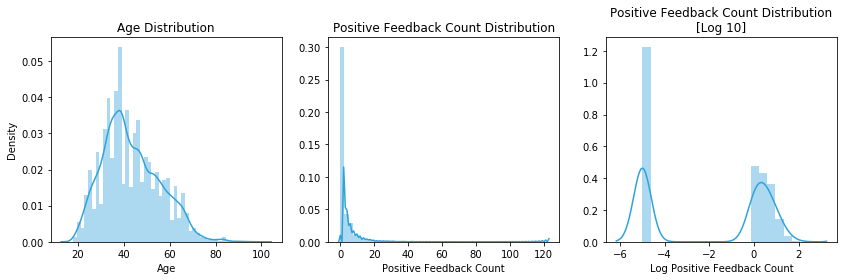

In [11]:
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+0.00001)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")

plt.tight_layout()
plt.show()

### **Code Explanation:** <br>
Using Matplotlib, a simple variable frequency barplot is created.

**Code Interpretation:** <br>
The vast majority of reviews were highly positive, with a score of five out of five. This suggests that this retail store is performing fairly well, but comparison to competitors would determine whether it is satisfactory. Competitor reviews may be scraped and analyzed. It is important to note that these reviews are subjective, and some negative reviews may a outcome of a bad day, instead of constructive feedback. In the plot below, the Label plot is the binary classification of 1 = good, and 0= bad.


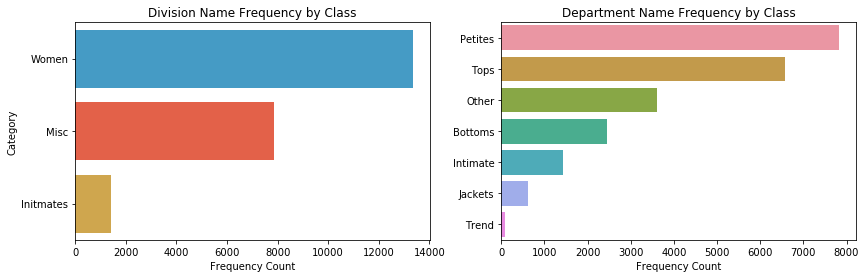

In [12]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("{} Frequency by Class".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

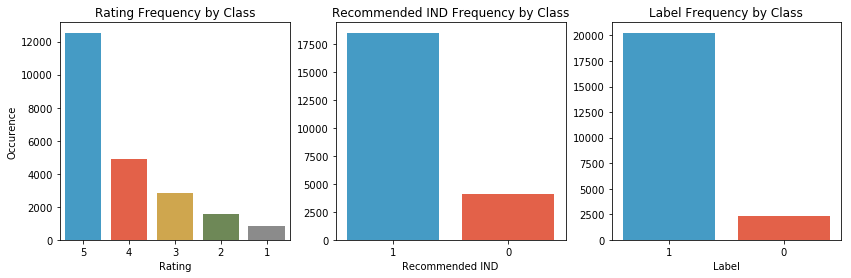

In [13]:
cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("{} Frequency by Class".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

### 2.2 Multivariate Plotting
### 2.2.1 Finding Redundancy between Categorical Variables

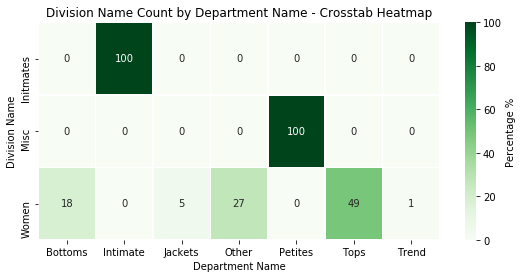

In [14]:
f, ax = plt.subplots(figsize=(9, 4))
s = sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax,fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
s.set_title('Division Name Count by Department Name - Crosstab Heatmap')
plt.show()

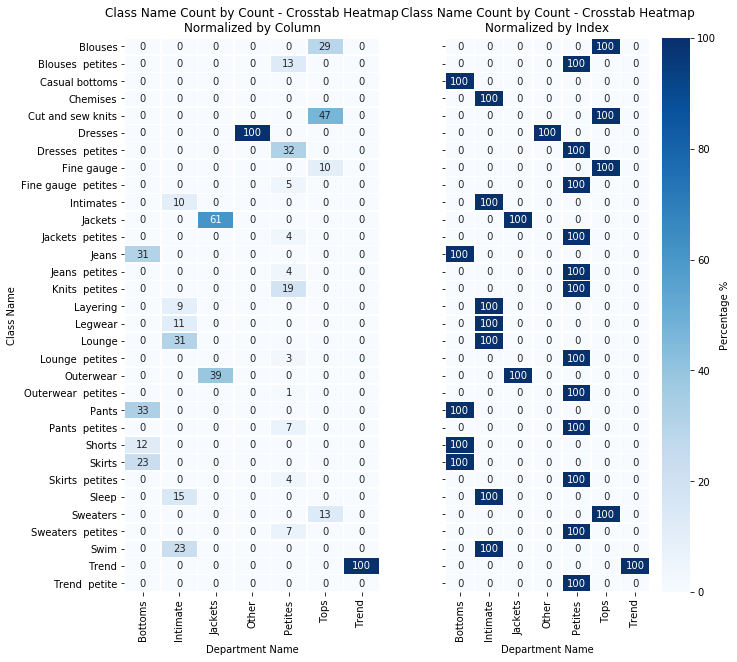

In [15]:
f, ax = plt.subplots(1,2,figsize=(10, 9), sharey=True)
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab Heatmap\nNormalized by Column')
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab Heatmap\nNormalized by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)

This heatmap above exposes the redundant nature of the "Division Name" variable. Furthermore, it indicates that "Petite" is a unecessary category within "Class Name" since it is already described in the "Department Name" variable as "Petites".

It should also be noted that "Department Name's" Other category only applies to dresses, so it should be renamed as such.

### Fixing the Redundancy

In [16]:
# Replace Other with Dress
df["Department Name"].replace({'Other':'Dresses'}, inplace=True)

# Petites Category
# df["Petites"] = 0
# df["Petites"][df["Department Name"]=="Petites"] = 1 

# Regular Expression to remove "Petites" specification in "Class Name"
class_length_before = len(set(df["Class Name"]))
df["Class Name"]= df["Class Name"].str.replace(
    r"(petites)|(petite)", '').str.strip().str.lower().str.capitalize()
class_length_after = len(set(df["Class Name"]))
                         
print("Class Name Category Count:\nBefore: {}\nAfter: {}\nDifference: {}".format(
    class_length_before, class_length_after,class_length_before-class_length_after))

Class Name Category Count:
Before: 33
After: 22
Difference: 11


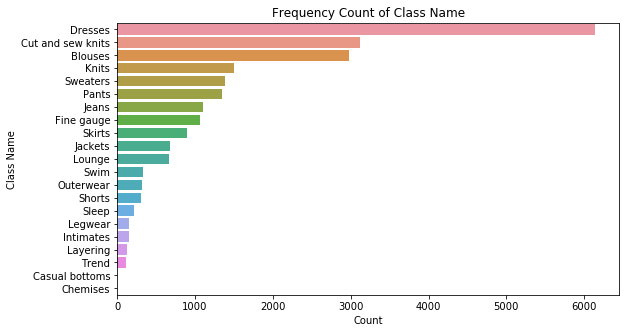

In [17]:
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

### 2.2.2 Plotting Continuous Variables by Category

Here I want to look at the behavior of the continous variables when sliced by various categorical varibles.

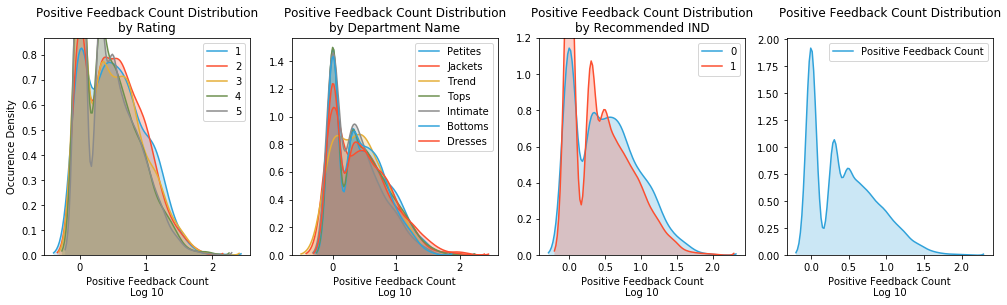

In [18]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plotdf = np.log10(df['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))

axes[0].set_ylabel('Occurence Density')

sns.kdeplot(plotdf,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
plt.show()

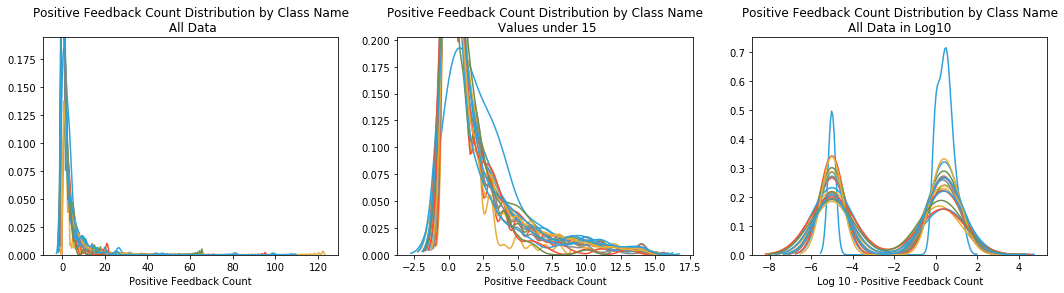

In [19]:
f, axes = plt.subplots(1,3, figsize=(18,4), sharex=False)
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[0])
    
axes[0].legend_.remove()
axes[0].set_xlabel('{}'.format(xvar))
axes[0].set_title('{} Distribution by {}\n All Data'.format(xvar, "Class Name"))

min_value = 15
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df["Class Name"]==x) &
                                              (df["Positive Feedback Count"] < min_value)]
                ,label=x, shade=False, ax=axes[1])
    
axes[1].legend_.remove()
axes[1].set_xlabel('{}'.format(xvar))
axes[1].set_title('{} Distribution by {}\n Values under {}'.format(xvar, "Class Name", min_value))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count']+0.00001)[df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[2])
    
axes[2].legend_.remove()
axes[2].set_xlabel('Log 10 - {}'.format(xvar))
axes[2].set_title('{} Distribution by {}\nAll Data in Log10'.format(xvar, "Class Name"))
plt.show()

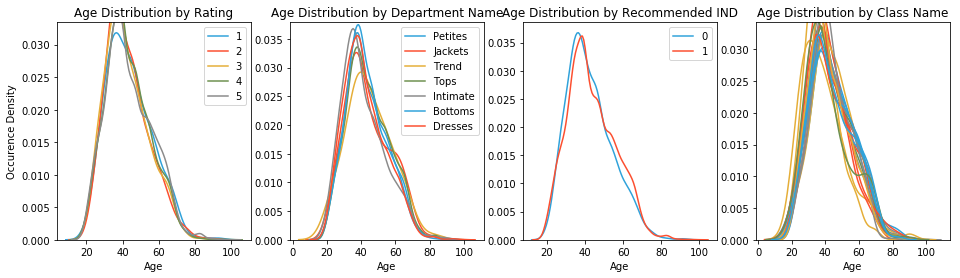

In [20]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

### **Code Explanation:** <br>


### **Code Interpretation:** <br>
My a priori expectation was that the biggest group of reviewing customers would be young, tech savvy women between the age of 18 and 34. However, this plot would say otherwise, since it appears that not only is the 34 to 50 year old age most engage in reviewing products, they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers. Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50.

### 2.2.3 Continous on Continous Analysis

Time for some scatter plots. with [Seaborn Joint Plot](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/).

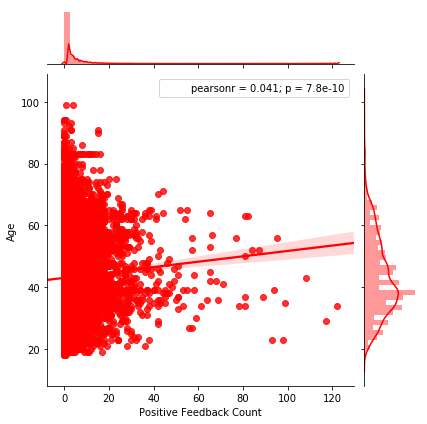

In [21]:
sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='r')
plt.show()

There appears to be a slight correlation between age and positive feedback count received. It would be interesting to focus on the textual anatomy of high positive feedback reviews.

### 2.2.4 Normalized Plotting

Since many variables are severely unbalanced, I employ normalization to see if the proportion is consistent between categorical classes. 

[Normalization in Seaborn - Stackoverflow](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)

In [22]:
def norm_barplot(x,y,hue, data, ax=None, order= None):
    """
    Normalize the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

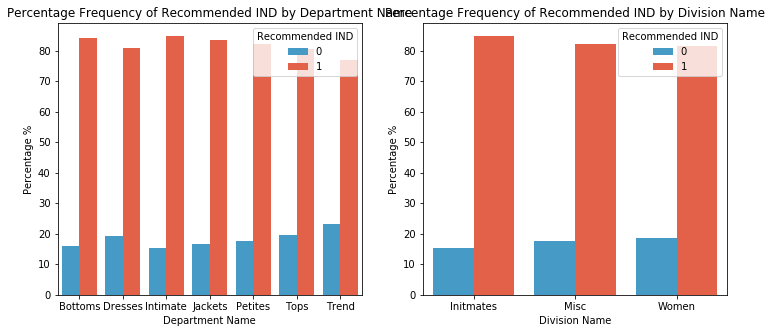

In [23]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x="Department Name",y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {} by Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
norm_barplot(x="Division Name",y="Percentage", hue=huevar,data=df, ax=axes[1])

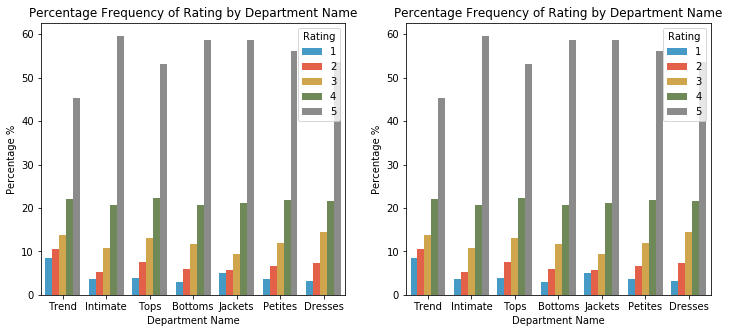

In [24]:
xvar = "Department Name"
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {} by {}".format(huevar, xvar))
axes[0].set_ylabel("Percentage %")
norm_barplot(x=xvar,y="Percentage", hue="Rating",data=df, ax=axes[1])

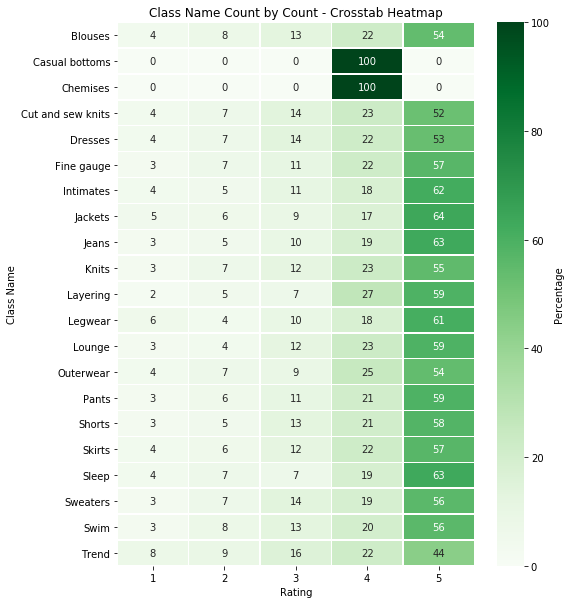

In [25]:
f, ax = plt.subplots(figsize=(8, 10))
# MANUAL NORMALIZE with Applied Lambda on Pandas DataFrame
# ctab = pd.crosstab(df['Class Name'], df["Rating"]).apply(lambda r: r/r.sum(), axis=1).mul(100)
ctab = pd.crosstab(df['Class Name'], df["Rating"], normalize='index').mul(100).round(0)
s = sns.heatmap(ctab,annot=True, linewidths=.5, ax=ax,fmt="g", cmap="Greens",
                cbar_kws={'label': 'Percentage'})
s.set_title('Class Name Count by Count - Crosstab Heatmap')
plt.show()

REWORK THIS

### **Code Explanation:** <br>
Once again using the seaborn package, the type of review (positive 1, negative 0) is explored in terms of the class of clothing. Since this is once again a frequency plot, only the x-axis variable “LABEL” is specified. The hue argument is what assigns separate bars and colors to each class type, and the kind argument specifies that the Label variable should be counted by frequency on the y-axis.

### **Code Interpretation:** <br>
Exploring the class variable suggests that the most popular clothing types are: Petite and Anthro, Dresses, Blouses, and Cut and Sew Knits. The distribution of reviews is fairly constant, suggesting that there are not negative nor positive outliers. This statement has been further verified by taking the mean of the label by class group. The results show that no class falls above .80, and the majority rest at .90. Casual bottoms and Chemises scored the highest in this criteria with a 100% positive review rate, however upon investigation this is because only 4 reviews were made in these categories.


In [26]:
#df.pivot_table(df.Rating.astype(int), index='Class Name', columns=['Department Name'])

In [27]:
# sns.factorplot(x="Department Name", y="Age", hue="smoker"#,col="day",
#                data=df, kind="box", size=4, aspect=.5);

## 2.  PreProcessing <a id="PreProcessing"></a>

### 2.1 Text Processing

In [28]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
2186,Perfection,"I almost never take the time to write reviews but this shirt is amazing... It's a super soft, stretchy, substantial fabric that is incredibly flattering. It falls perfectly and is insanely comfortable. I am 5'5"" 120 lbs and usually wear an XS or S in Anthro tops... I went with the XS and it is a perfect fit. Love it so much I bought it in 4 colors... I am now completely broke but these shirts will be in constant rotation.",5
17061,"So soft, pretty and unique","This sweater was just what I was looking for. It is so soft & comfortable. The design is unique and delicate, yet doesn't shed or itch. The decorations are not as pure white as pictured, there are several different tones of ivories & creams. I ordered the XS, which is my typical size in Anthro sweaters, as I find that most run very large and this is no exception. It is oversize, but not bulky. However, the decorations do add some volume, so maybe not for all body types.",5
8842,old world meets modern day,This top has so many details. I love the material. It adds a little formal to the casual jean. I am waiting to wear this come Fall weather with slim jeans and some boots. It gives me that old victorian vibe without being still and formal.,5
150,Gorgeous skirt!,"Like other reviewers noted, the pics don't do this skirt justice. It is truly beautiful with an intricate lace pattern and rich colors. Can't wait to wear this to work!",5
12186,Updated white shirt,First tried on a large but wanted a little more room which an XL gave me. It is just what I wanted to update my wardrobe.,4
6925,Perfect with 1 alteration!,"The pictures of this dress do NOT do it justice. I bought it, cut the sleeves off to be even with the waist line and belted (with a slim belt ) AND IT IS PERFECT! It actually becomes a very sexy dress, it is a true wrap with a deep V and the vent in the back, I mean this dress paid dividends at the end of the night (to be very honest)!\r\r\n\r\r\nWearing this to South Beach, it will be perfect with strappy, high heels.",5
6821,Not like the picture,"Got this for my daughter for Christmas. She loves the ""boho peasant"" look. I thought the fabric would be white or at least cream color but it was closer to pale yellow. Although the fabric quality and texture is lovely (more substantive than I expected) , she just couldn't like the top with the color being so off.\r\nDisappointing as picture makes it much prettier.",3


Evidently, the text data requires further processing .

In [29]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    return words

### **Code Explanation:** <br>
This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.

***

### **Code Interpretation:** <br>
In order to process the dataset’s centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality deviance. I contemplated exploring the use of sequential models, such as Long Short-term memory, which would benefit from stopwords, but unfortunately I could only find predictive applications of it, no insight extracting aspects. 

The last piece of data transformation conducted was to bin the continuous variable age into a categorical variable: age category.

### 2.2 Helper/Utility Functions <a id="Helper/Utility Functions"></a>

In [30]:
# # Matplotlib Font Calibration
# def default_font():
#     plt.rc('axes', titlesize=20) # Axes Title Size
#     plt.rc('axes', labelsize=18) # Plot Title Size
#     font = {'family' : 'normal',
#             'weight' : 'normal',
#             'size'   : 15}
#     plt.rc('font', **font) # Label Font

***

## 4. Sentiment Analysis <a id="Sentiment Analysis"></a>

My first attempt at understanding the customer reviews is to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the contructive variant.

I will also explore the interaction between sentiment score:
- Raiting
- Recommended
- Positive Feedback Count

In [31]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

#### **Code Explanation:** <br>
*Pre-processing* chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code *Applying Model and Variable Creation* classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

- Neutral/Negative/Postive Score: Indicates the potency of these classes between 0 and 1. Onl
- Polarity Score: Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.

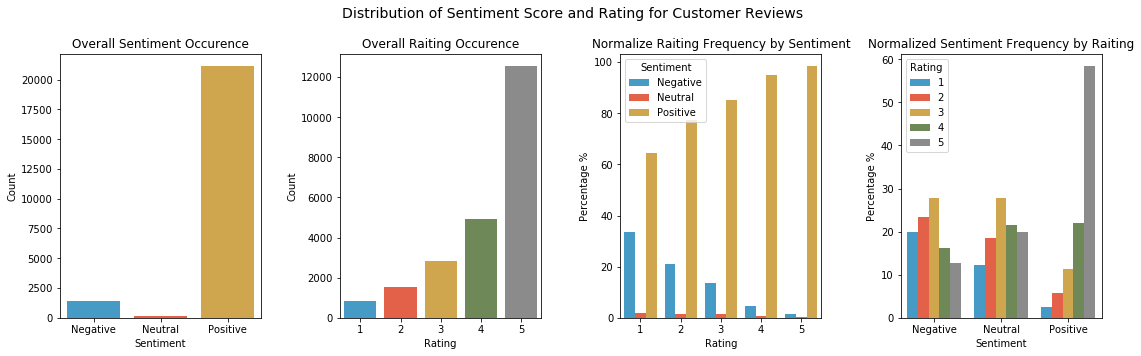

In [32]:
f, axes = plt.subplots(1,4, figsize=[16,5])
sns.countplot(x="Sentiment", data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_title("Overall Sentiment Occurence")

sns.countplot(x="Rating", data=df, ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")
axes[1].set_title("Overall Raiting Occurence")

norm_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[2])
#sns.countplot(x="Rating", hue="Sentiment", data=df, ax=axes[2])
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Percentage %")
axes[2].set_title("Normalize Raiting Frequency by Sentiment")

norm_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[3])
axes[3].set_ylabel("Occurence Frequency")
axes[3].set_title("Normalized Sentiment Frequency by Raiting")
axes[3].set_xlabel("Sentiment")
axes[3].set_ylabel("Percentage %")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()

#### **Interpretation:** <br>
The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

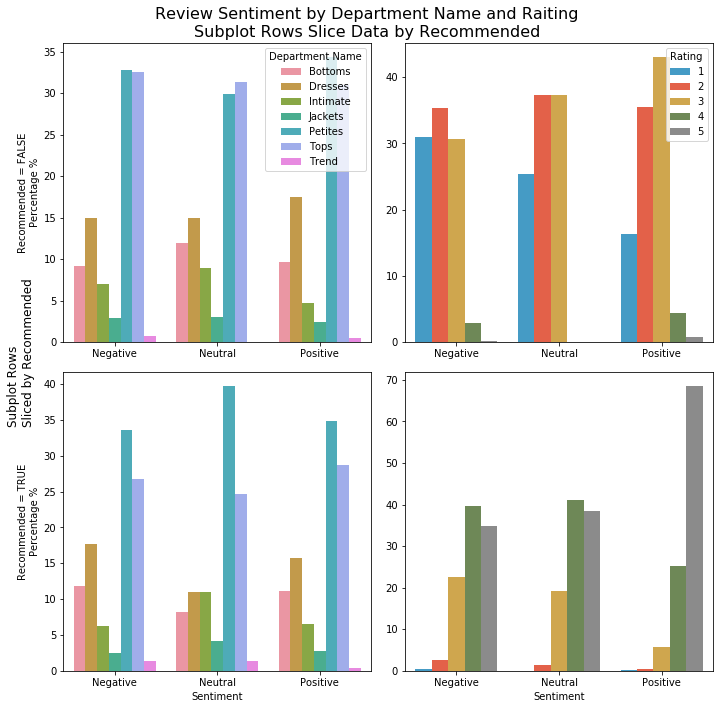

In [33]:
# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    norm_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    norm_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

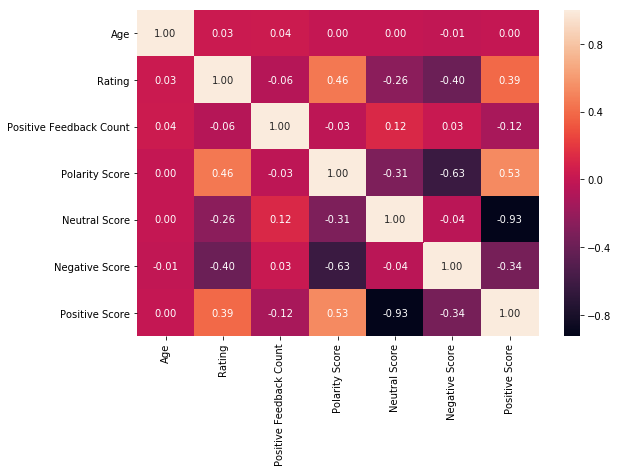

In [34]:
df.Rating = df.Rating.astype(int)
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f")

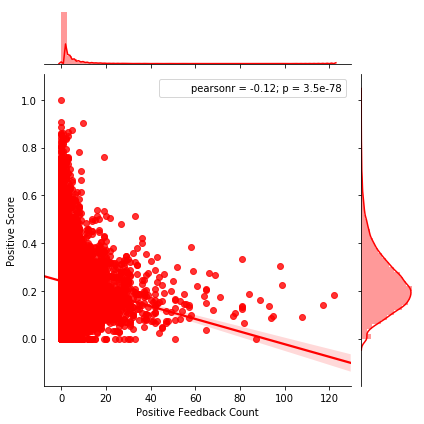

In [35]:
# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.

## 6. Word Distribution and Word Cloud <a id="Word Distribution and Word Cloud"></a> <br>
Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews. Using the categories good and bad, I created two separate word clouds.

** For this section, I deviated from the book and heavily relied upon the following online resources:** <br>
- [Kaggle Longdoa: Word Cloud in Python](https://www.kaggle.com/longdoan/word-cloud-with-python)
- [Word Cloud Package Forum](https://github.com/amueller/word_cloud/issues/134)
- [Amueller Github](https://amueller.github.io/word_cloud/auto_examples/masked.html)

In [36]:
stopwords = set(STOPWORDS)
size = (20,10)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

#### **Code Explanation:** <br>
This code creates the word cloud visualization function. This function’s mathematical processes are hidden, since it does not explicitly state that it determines the frequency occurrence of each word in relation to the entire dictionary of words. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence. 

### Visualize Titles

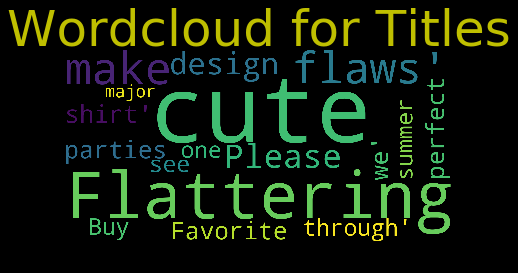

In [38]:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Wordcloud for Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

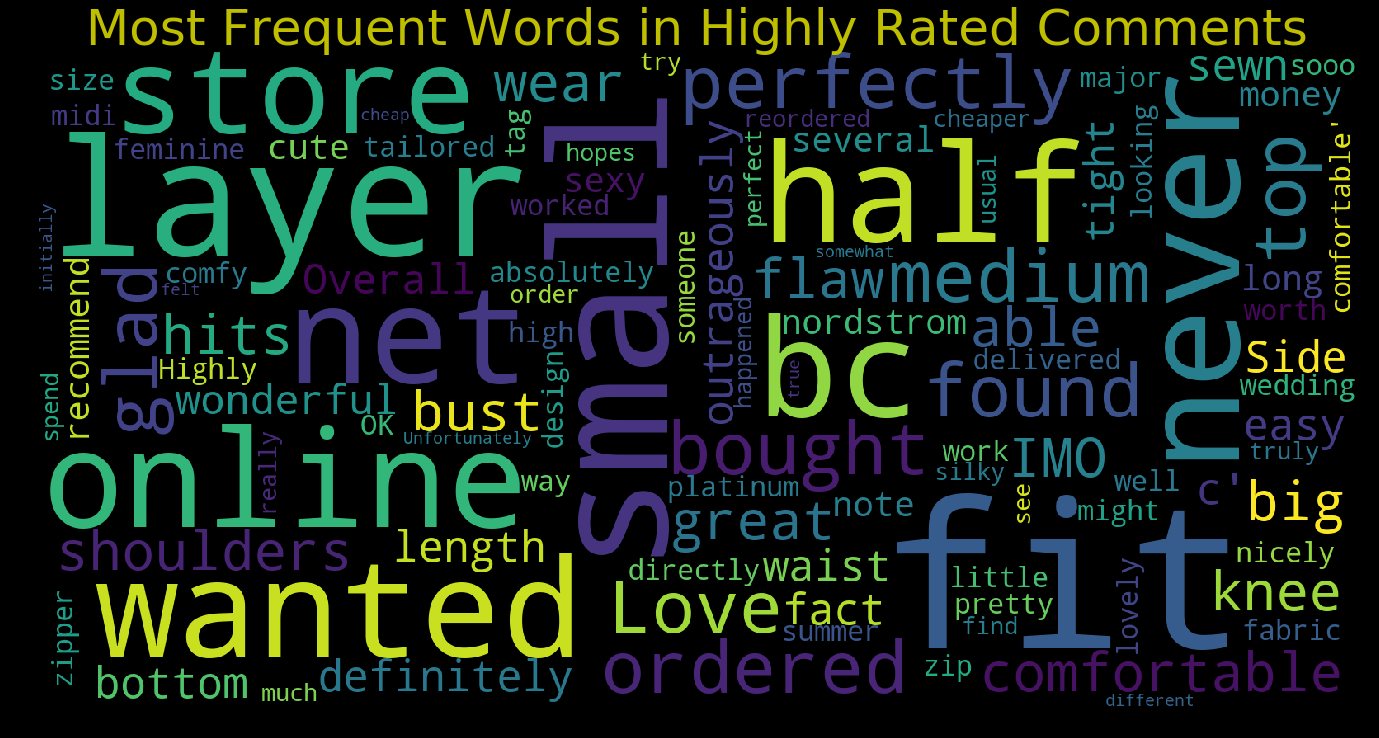

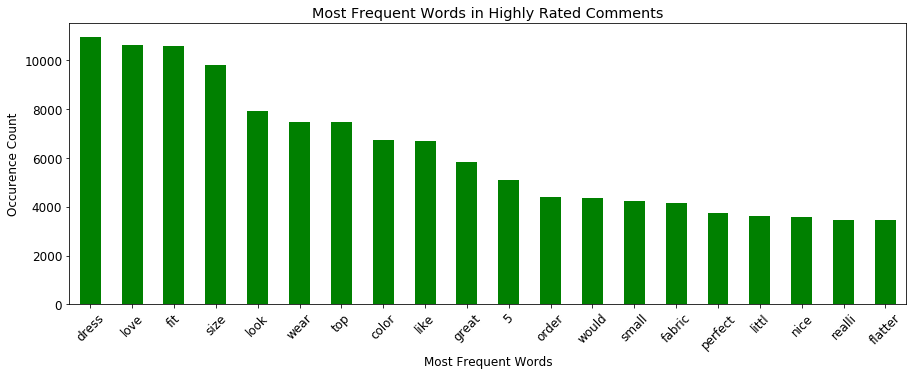

In [39]:
# Highly Raited
title ="Most Frequent Words in Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurence Count")
plt.xlabel("Most Frequent Words")
plt.show()

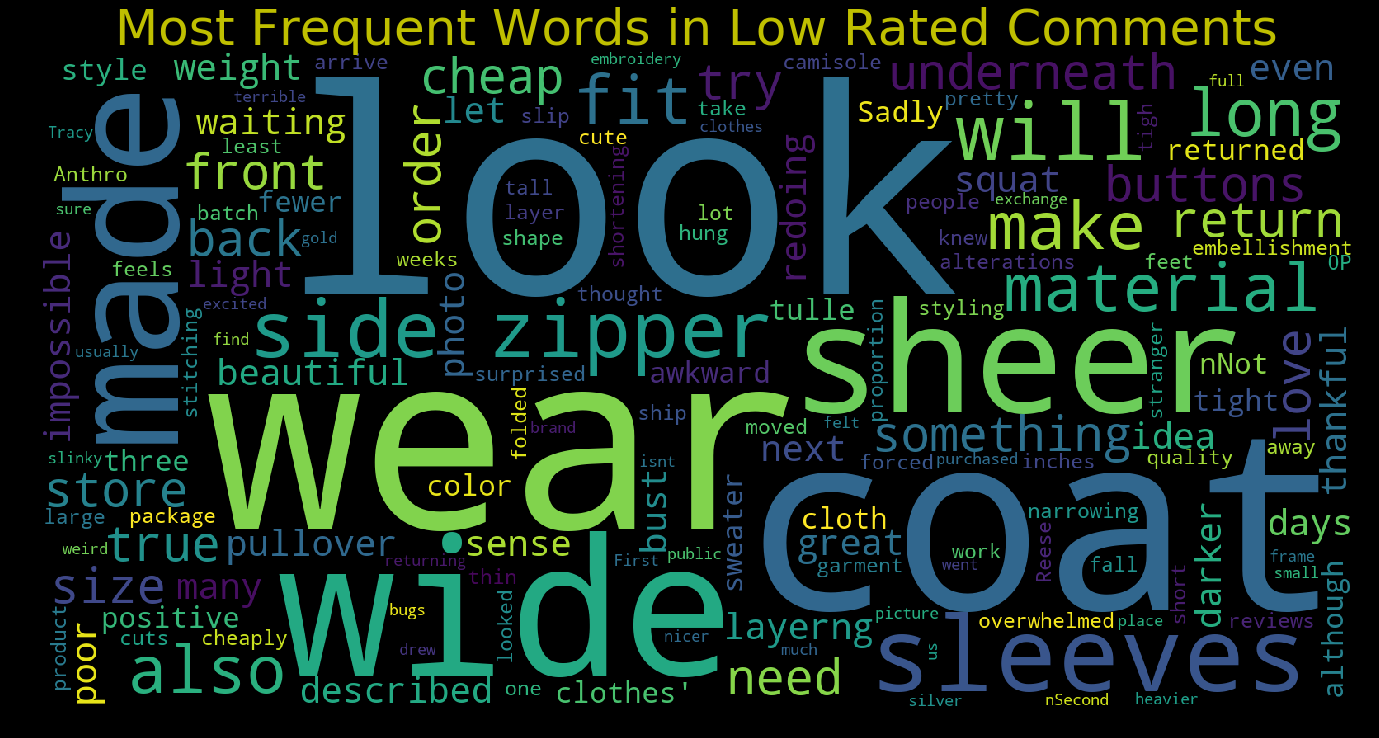

In [40]:
# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

#### **Code Interpretation:** <br>
At a first glance the most common words overlap significantly between good and bad reviews. Indeed, the observation that “Dress” and “Top” are the most common words is reflected by the disproportionate number of reviews in the dress category. Looking at the rest of the words, the positive reviews tend to use words such as: Love, Comfortable, Great, Style, Small, Flattering, Wear, True. This offers the first big insight because within the expected positive words, the words “True” stands out, since it suggest consistency between customer expectation of the product and what the product actually delivered. In terms of negative reviews, notable words include: unflattering, big, unfortunately appear. These negative words represent the small proportion of words in the negative reviews. This suggests that either people are expressing their criticism with negative prefixes, such as “Not Pretty”, or people are sticking to constructive criticism only, addressing problems of fit or appearance rather than simply expressing anger.

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences. Although I would have prefered to visualize these findings through the use of Word Clouds, I was unable to program this in, thus leaving me with a simple table.

In the section below, the 15th most frequent 2 and 3 gram sequences are on display for both the good and bad reviews.

### I am curious to see the wordcloud by Specific group.

Perhaps I can seperate this analysis between clouds and ngrams.

1. Department Name
2. Over 20 Positive Review Count
3. Whether it was Recommended IND

In [41]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()

def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="WordCloud for {}".format(subclass),
          stopwords= new_stop,
          size = (10,6))

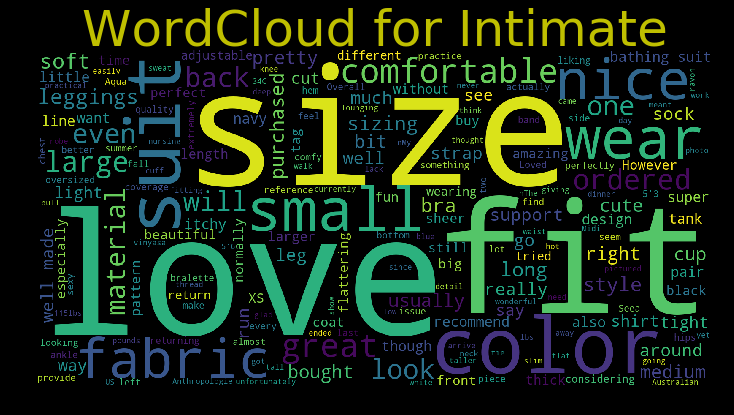

In [42]:
cloud_by_category(df, "Department Name", department_set[0])

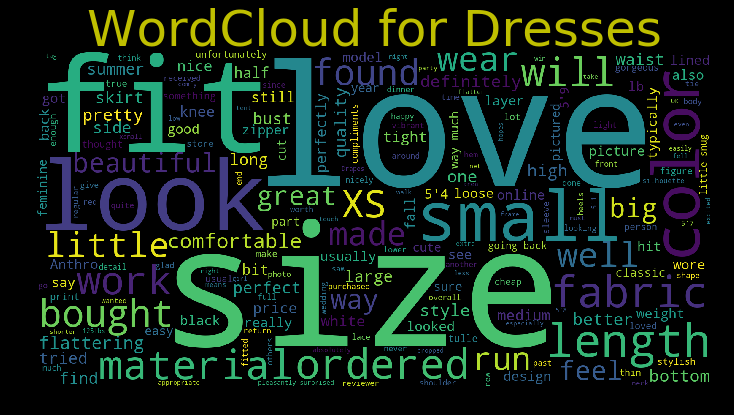

In [43]:
cloud_by_category(df, "Department Name", department_set[1])

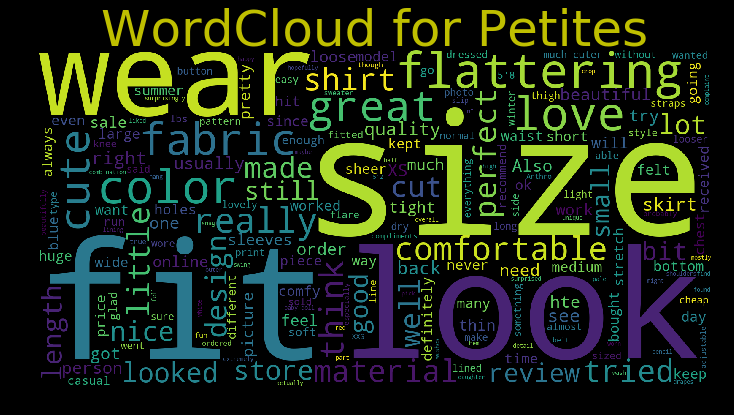

In [44]:
cloud_by_category(df, "Department Name", department_set[2])

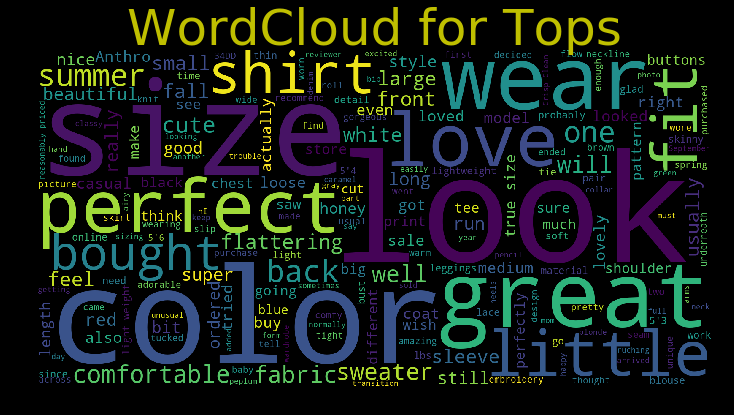

In [45]:
cloud_by_category(df, "Department Name", department_set[3])

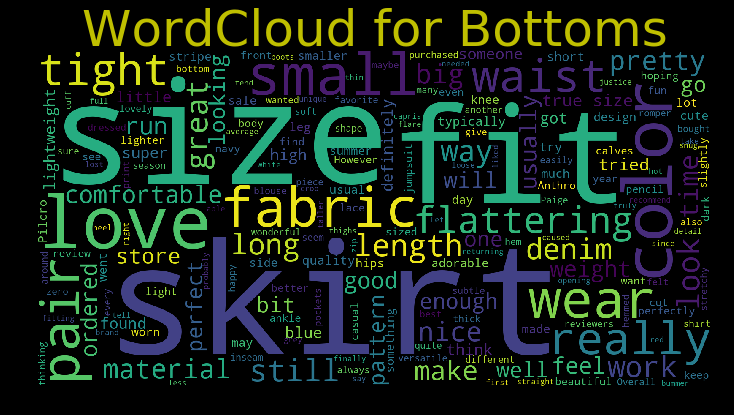

In [46]:
cloud_by_category(df, "Department Name", department_set[4])

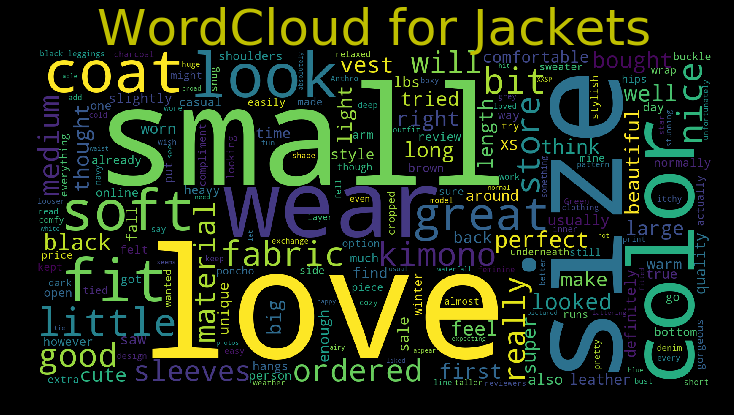

In [47]:
cloud_by_category(df, "Department Name", department_set[5])

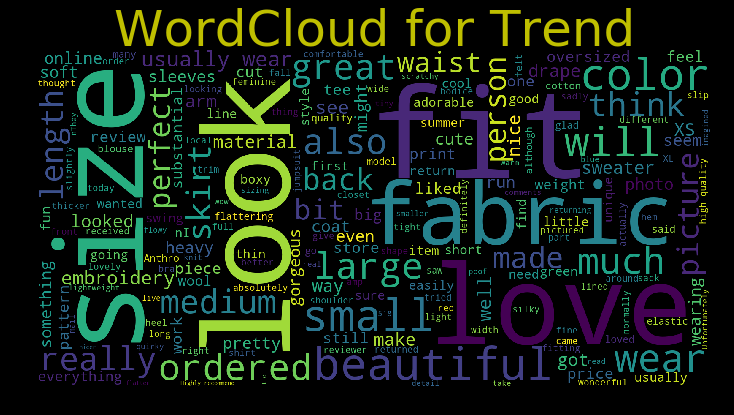

In [48]:
cloud_by_category(df, "Department Name", department_set[6])

In [49]:
"""
for x in set(df["Department Name"][df["Department Name"].notnull()]):
    # Modify Stopwords to Exclude Class types, suchs as "dress"
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                    + ["dress", "petite", "jacket","top"]
                    + [x.lower() for x in list(df["Department Name"][df["Department Name"].notnull()].unique())])

    # Cloud
    cloud(text= df["Review Text"][df["Department Name"]== x],
          title="WordCloud for {}".format(x),
          stopwords= new_stop,
          size = (10,6))
"""

'\nfor x in set(df["Department Name"][df["Department Name"].notnull()]):\n    # Modify Stopwords to Exclude Class types, suchs as "dress"\n    new_stop = set(STOPWORDS)\n    new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]\n                    + ["dress", "petite", "jacket","top"]\n                    + [x.lower() for x in list(df["Department Name"][df["Department Name"].notnull()].unique())])\n\n    # Cloud\n    cloud(text= df["Review Text"][df["Department Name"]== x],\n          title="WordCloud for {}".format(x),\n          stopwords= new_stop,\n          size = (10,6))\n'

## N Grams
Expand on this section by making new variables out of interesting words.

In [50]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [51]:
gram_table(data= df['Review Text'][df.Rating.astype(int) >= 3], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,10969,true size,1299,fit true size,478,compliment everi time wear,50,34b 26 waist 36 hip,27
1,love,10634,fit perfectli,1064,run true size,198,26 waist 36 hip,32,get compliment everi time wear,25
2,fit,10613,look great,952,receiv mani compliment,172,look great skinni jean,32,5 2 current 33 25,17
3,size,9809,love dress,861,love love love,142,34b 26 waist 36,28,115 lb 30 dd 26,15
4,look,7935,look like,824,small fit perfectli,141,get compliment everi time,27,lb 30 dd 26 5,13
5,wear,7487,5 4,669,fit like glove,135,5 4 120 lb,26,115 lb 30dd 26 5,13
6,top,7468,usual wear,630,usual wear size,117,dress fit true size,25,2 current 33 25 37,13
7,color,6727,love top,628,order usual size,102,115 lb 30 dd,22,2 34b 26 waist 36,12
8,like,6711,fit well,622,run littl big,89,love love love dress,22,5 1 5 115 lb,12
9,great,5849,usual size,594,look great jean,89,fit true size 5,22,5 2 34b 26 waist,12


In [52]:
gram_table(data= df['Review Text'][df.Rating.astype(int) < 3], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,look,1419,look like,330,realli want love,40,look like matern top,9,go back thought dress would,2
1,dress,1218,go back,178,realli want like,29,realli want like top,8,well happi hour date night,2
2,like,1164,want love,126,want love dress,24,realli want love dress,8,jean would order found thing,2
3,size,912,realli want,86,fit true size,22,5 4 120 lb,6,hand wash dri clean hand,2
4,top,907,made look,79,look noth like,20,realli want like dress,6,purchas anoth eva franco dress,2
5,fit,899,felt like,68,make look like,20,look noth like model,5,ag jean fan late though,2
6,love,761,usual wear,66,look like wear,20,look like matern dress,5,anthro recent 20 sale look,2
7,would,743,5 4,66,sadli go back,19,return realli want love,5,color pictur want made actual,2
8,fabric,726,love dress,64,made look like,19,look noth like pictur,4,transit well happi hour date,2
9,order,625,size small,61,look like matern,19,look like potato sack,4,find materi much stretchi want,2


## Intelligible Supervised Learning

In [53]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # Apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['Review Text'])) # Calculate word occurence from whole block of text

vocab_count = 300
word_features= list(all_words.keys())[:vocab_count] # 5000 most recurring unique words
print("Number of words columns (One Hot Encoding): {}".format(len(all_words)))

Number of words columns (One Hot Encoding): 9810


In [55]:
labtext= list(zip(df.tokenized, (df.Label))) 
# Tuple each review with its label (1= greater/equal to 3, 0= under 3)

In [56]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [57]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

22641

In [58]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

In [61]:
classifier = nltk.NaiveBayesClassifier.train(training_set) # Very scalable algorithm
# Posterior = prior_occurence * likelihood / evidence

In [62]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier accuracy percent: 88.8103651355
Most Informative Features
                    tore = True                0 : 1      =     20.3 : 1.0
                     pix = True                0 : 1      =      8.7 : 1.0
                mismatch = True                0 : 1      =      8.7 : 1.0
                     wor = True                0 : 1      =      8.7 : 1.0
                  granni = True                0 : 1      =      8.7 : 1.0
                    10lb = True                0 : 1      =      8.7 : 1.0
                  vulner = True                0 : 1      =      8.7 : 1.0
                sturdier = True                0 : 1      =      8.7 : 1.0
                starbuck = True                0 : 1      =      8.7 : 1.0
                    spun = True                0 : 1      =      8.7 : 1.0
                 moveabl = True                0 : 1      =      8.7 : 1.0
                   drove = True                0 : 1      =      8.7 : 1.0
                instruct = True

## Word2Vec

In [65]:
import gensim
from gensim.models import word2vec
import os
os.chdir(r"D:\My Computer\DATA\Retail")
os.listdir()

['featuresets.pickle', 'GoogleNews-vectors-negative300.bin.gz']

In [66]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [67]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized
0,33,NaN,absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,1,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]"
1,34,NaN,"Love this dress! It's sooo pretty. I happened to find it in a store, and I'm glad I did bc I never would have ordered it online bc it's petite. I bought a petite and am 5'8"". I love the length on me- hits just a little below the knee. Would definitely be a true midi on someone who is truly petite.",5,1,4,Women,Dresses,Dresses,1,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]"
2,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. I initially ordered the petite small (my usual size) but I found this to be outrageously small. So small in fact that I could not zip it up! I reordered it in petite medium, which was just OK. Overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. IMO, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,Women,Dresses,Dresses,1,0.9520,0.784,0.027,0.190,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]"
3,50,My Favorite Buy!,"I love, love, love this jumpsuit. It's fun, flirty, and fabulous! Every time I wear it, I get nothing but great compliments!",5,1,0,Misc,Petites,Pants,1,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]"
4,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. It is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. Love this shirt!!!,5,1,6,Women,Tops,Blouses,1,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]"


In [68]:
w2vec = word2vec.Word2Vec(df["tokenized"], min_count=5, size=200)

In [69]:
w2vec.most_similar(["versatil"],topn=10)

[('casual', 0.8652435541152954),
 ('classi', 0.8643320798873901),
 ('statement', 0.8594675064086914),
 ('blazer', 0.850208044052124),
 ('everyday', 0.8456282615661621),
 ('dressi', 0.8419816493988037),
 ('fun', 0.8336341381072998),
 ('varieti', 0.82709139585495),
 ('busi', 0.8251614570617676),
 ('chic', 0.8224829435348511)]

In [70]:
w2vec.most_similar(["potato"],topn=10)

[('circu', 0.9261988401412964),
 ('moo', 0.903049647808075),
 ('sack', 0.896537184715271),
 ('frankli', 0.868861198425293),
 ('muumuu', 0.8557521104812622),
 ('shapeless', 0.8520616292953491),
 ('grandma', 0.8509957790374756),
 ('dumpi', 0.8433201909065247),
 ('halloween', 0.8409938812255859),
 ('boxier', 0.834764838218689)]

In [71]:
w2vec.most_similar(["worst"],topn=10)

[('mainli', 0.9433833956718445),
 ('nightmar', 0.9398306012153625),
 ('chair', 0.9338241815567017),
 ('imposs', 0.9302481412887573),
 ('tankini', 0.9301319122314453),
 ('older', 0.9257405400276184),
 ('embarrass', 0.9235817193984985),
 ('tug', 0.9233388900756836),
 ('yike', 0.9225705862045288),
 ('opposit', 0.9213823080062866)]

In [72]:
w2vec.most_similar(["rag"],topn=10)

[('mumu', 0.9310739040374756),
 ('discomfort', 0.9078426361083984),
 ('static', 0.9066904783248901),
 ('joy', 0.9007584452629089),
 ('elegantli', 0.9003733992576599),
 ('ord', 0.8973898887634277),
 ('wrinkli', 0.8971692323684692),
 ('bed', 0.8949662446975708),
 ('prepar', 0.8927992582321167),
 ('f', 0.8907408714294434)]

In [73]:
w2vec.most_similar(["compliment"],topn=10)

[('ton', 0.8792416453361511),
 ('complement', 0.8730794787406921),
 ('numer', 0.7393916845321655),
 ('ts', 0.7318289875984192),
 ('mani', 0.7083941102027893),
 ('galor', 0.6941606402397156),
 ('constant', 0.6626620292663574),
 ('load', 0.6556378602981567),
 ('stranger', 0.6545270681381226),
 ('countless', 0.644906759262085)]

In [74]:
w2vec.most_similar(["love"],topn=10)

[('ador', 0.8256118297576904),
 ('amaz', 0.7106754779815674),
 ('gorgeou', 0.6975160241127014),
 ('fabul', 0.6644940376281738),
 ('beauti', 0.6522128582000732),
 ('awesom', 0.6409063339233398),
 ('wonder', 0.6107620000839233),
 ('fantast', 0.6019666790962219),
 ('sweet', 0.598039984703064),
 ('fun', 0.595461368560791)]

In [75]:
w2vec.most_similar(["shame"],topn=10)

[('ugli', 0.9323654174804688),
 ('cheek', 0.9233472347259521),
 ('jut', 0.912338376045227),
 ('safeti', 0.9092015027999878),
 ('handl', 0.9066605567932129),
 ('regrett', 0.9061797857284546),
 ('meh', 0.9054487347602844),
 ('wing', 0.9041448831558228),
 ('laughabl', 0.8986210823059082),
 ('promin', 0.8979836106300354)]

In [76]:
w2vec.most_similar(["dear"],topn=10)

[('ranna', 0.9649199843406677),
 ('encourag', 0.9630786180496216),
 ('answer', 0.9626279473304749),
 ('franco', 0.9587253332138062),
 ('rule', 0.9581344127655029),
 ('british', 0.9573205709457397),
 ('learn', 0.9566104412078857),
 ('akemi', 0.9564032554626465),
 ('benefit', 0.9550616145133972),
 ('eva', 0.9544743299484253)]